<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/Python_Data_Analysis_PART_II_Pandas_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <<  Data Analysis with Python PART II >> 
# Pandas Programming
**C. Alex Hu @ 2021/05/17**

## <  CONTENTS  >

[Intro to Pandas](#Intro_to_Pandas)
 
[1. Pandas 資料結構](#Data_Structure)

[2. Series (序列)](#Series)
- [2.1 Using a list, ndarray or dictionary to create a Series](#2.1)
- [2.2 Using a scalar value to create a Series](#scalar_value)
- [2.3 Series is ndarray-like](#Series_is_ndarray-like)
- [2.4 Series is dict-like](#Series_is_dict-like)
- [2.5 A key difference between Series and ndarray](#key_difference)
- [2.6 Series can also have a name attribute](#name_attribute)
- [2.7 Time Series (時間序列)](#Time_Series)
- [2.8 建立依時間序列排序的資料表](#2.8)

[3. DataFrame (資料框)](#DataFrame)
- [3.1 Creating DataFrame (產生資料框)](#Creating_DataFrame)
- [3.2 Merge, Join, and Concatenate DataFrames](#Merge_Join_and_Concatenate_DataFrames)

[4. Data Analysis & Manipulation](#Data_Analysis_&_Manipulation)
- [4.1 Summarizing](#Summarizing)
- [4.2 Manipulation of DataFrame](#Manipulation_of_DataFrame)
- [4.3 Quality check](#Quality_check)
- [4.4 Rename Columns](#Rename_Columns)
- [4.5 Dealing with outliers](#Dealing_with_outliers)
    - [Boxplot](#Boxplot)
    - [Histogram](#Histogram)
- [4.6 Groupby](#Groupby)
- [4.7  Pivot Tables (樞紐分析表 或 透視表)](#Pivot_Tables)
     - [Pivot Tables using Pandas `groupby`](#Pivot_Tables_using_groupby)
     - [Pivot Tables using Pandas `pivot_table`](#Pivot_Tables_using_pivot_table)

[5. File I/O](#File_I/O)
- [5.1 Write to .csv files](#Write_to_csv_files)
- [5.2 Read from .csv files](#Read_from_csv_files)
- [5.3 Read csv from url](#Read_csv_from_url)

<a id='Intro_to_Pandas'></a>
# Intro to Pandas
- Python 標準程式庫的延伸，應用於資料的處理 (Data Manipulation)
- 一般而言，資料分析的前 80% 時間花在清理和準備資料 (cleansing & preparing data) ; 這就需要用到 Pandas library 來進行這些前置處理 (preprocessing) 作業。
- Ref. :  http://pandas.pydata.org/pandas-docs/stable/index.html


<a id="Data_Structure"></a>
#   1. Pandas 資料結構 
>- Pandas 有兩個主要的資料結構：Series (序列) 和 DataFrame (資料框)。 
>    - 其中，Series 是一維序列資料結構；DataFrame 是二維的資料結構。
>
>
>- R 語言的使用者對於 DataFrame 並不陌生，因為 DataFrame 是 R 語言的產物。
>- 目前，DataFrame 的資料格式已廣泛被資料科學領域的研發人員採用，因此，舉凡 Python、Scala、Java 等程式語言也都接受 DataFrame 資料格式分享資料。
>
>
>- **Pandas 是以 NumPy 為基礎**，所以，能夠有效整合科學運算的開發環境。


+ **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

<a id="Series"></a>
#  2.  Series (序列)

- Series 是一維具有標籤的陣列 (labeled array)，能夠儲存任何 Python 資料型別的資料 (例如：整數、浮點數、字串、物件等)。 
- 通常，axis labels 指的是 "索引 (index)"。

<a id='2.1'></a>
### 2.1 Using a list, ndarray or dictionary to create a Series

In [ ]:
#  Using pd.Series(data, index=index) to create Series
s = pd.Series([1,1,2,3,5,8, np.nan, 2021, 517])    
s

0       1.0
1       1.0
2       2.0
3       3.0
4       5.0
5       8.0
6       NaN
7    2021.0
8     517.0
dtype: float64

In [ ]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.284063
b   -1.555630
c   -1.743534
d   -1.482500
e    1.016748
dtype: float64

In [ ]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
#  Using a dictionary to create a Series
d = {'a' : 0., 'b' : 1., 'c' : 2.}   
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [ ]:
pd.Series(d, index=['b', 'c', 'd', 'a'])   #  NaN (not a number) is the standard missing data marker used in pandas

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

<a id='scalar_value'></a>
### 2.2 Using a scalar value to create a Series

In [ ]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

<a id='Series_is_ndarray-like'></a>

### 2.3 Series is ndarray-like
- 大部份的情況下，Series 的運算很像 ndarray，可以採用 NumPy 函數。

In [ ]:
s[0]

-0.2840626758626949

In [ ]:
s[:3]

a   -0.284063
b   -1.555630
c   -1.743534
dtype: float64

+ **Fancy Indexing**

In [ ]:
s > s.median()

a     True
b    False
c    False
d    False
e     True
dtype: bool

In [ ]:
s[s > s.median()]

a   -0.284063
e    1.016748
dtype: float64

In [ ]:
s[[4, 3, 1]]

e    1.016748
d   -1.482500
b   -1.555630
dtype: float64

+ **Vectorization**

In [ ]:
np.exp(s)  

a    0.752719
b    0.211056
c    0.174901
d    0.227069
e    2.764191
dtype: float64

<a id='Series is dict-like'></a>
### 2.4 Series is dict-like
- Series 也可以像 dictionary，利用 索引標籤 (index label) 擷取和設定其值。

In [ ]:
s['a']

-0.2840626758626949

In [ ]:
s['e'] = 2021
s

a      -0.284063
b      -1.555630
c      -1.743534
d      -1.482500
e    2021.000000
dtype: float64

In [ ]:
'e' in s

True

In [ ]:
'f' in s

False

In [ ]:
s['f']   # If a label is not contained, an exception is raised

KeyError: 'f'

+ 利用 **`get`** 方法擷取一個遺失標籤 (a missing label)，將回傳 **`None`** 或預設的值

In [ ]:
s.get('f')  

In [ ]:
print(s.get('f'))

None


In [ ]:
s.get('f', 'Not available!')

'Not available!'

<a id='key_difference'></a>
###  2.5 A key difference between Series and ndarray 
- 兩個 Series 之間的運算會自動進行 **"標籤對齊 (Label Allignment)"**。 

In [ ]:
s[1:]

b      -1.555630
c      -1.743534
d      -1.482500
e    2021.000000
dtype: float64

In [ ]:
s[:-1]

a   -0.284063
b   -1.555630
c   -1.743534
d   -1.482500
dtype: float64

+ **Operation between Two `Series` Data** 

In [ ]:
s[1:] + s[:-1]

a         NaN
b   -3.111260
c   -3.487068
d   -2.965000
e         NaN
dtype: float64

+ **Operation between Two `Ndarray` Data** 

In [ ]:
np.array(s[1:]) + np.array(s[:-1])

array([-1.83969282e+00, -3.29916438e+00, -3.22603432e+00,  2.01951750e+03])

<a id='name_attribute'></a>
### 2.6 Series can also have a name attribute

In [ ]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -0.164391
1    0.953828
2   -0.038112
3   -1.131585
4    1.489758
Name: something, dtype: float64

In [ ]:
s.name

'something'

In [ ]:
s2 = s.rename("different")
s2.name

'different'

<a id='Time_Series'></a>
### 2.7 Time Series (時間序列)

In [ ]:
dates = pd.date_range('20210501',periods=31)   # pd.date_range()
dates

DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
rng = pd.date_range('5/1/2021', periods=48, freq='H')  #  48 hours starting with midnight March 1st, 2018
rng[:18]

DatetimeIndex(['2021-05-01 00:00:00', '2021-05-01 01:00:00',
               '2021-05-01 02:00:00', '2021-05-01 03:00:00',
               '2021-05-01 04:00:00', '2021-05-01 05:00:00',
               '2021-05-01 06:00:00', '2021-05-01 07:00:00',
               '2021-05-01 08:00:00', '2021-05-01 09:00:00',
               '2021-05-01 10:00:00', '2021-05-01 11:00:00',
               '2021-05-01 12:00:00', '2021-05-01 13:00:00',
               '2021-05-01 14:00:00', '2021-05-01 15:00:00',
               '2021-05-01 16:00:00', '2021-05-01 17:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
rng[24:]

DatetimeIndex(['2021-05-02 00:00:00', '2021-05-02 01:00:00',
               '2021-05-02 02:00:00', '2021-05-02 03:00:00',
               '2021-05-02 04:00:00', '2021-05-02 05:00:00',
               '2021-05-02 06:00:00', '2021-05-02 07:00:00',
               '2021-05-02 08:00:00', '2021-05-02 09:00:00',
               '2021-05-02 10:00:00', '2021-05-02 11:00:00',
               '2021-05-02 12:00:00', '2021-05-02 13:00:00',
               '2021-05-02 14:00:00', '2021-05-02 15:00:00',
               '2021-05-02 16:00:00', '2021-05-02 17:00:00',
               '2021-05-02 18:00:00', '2021-05-02 19:00:00',
               '2021-05-02 20:00:00', '2021-05-02 21:00:00',
               '2021-05-02 22:00:00', '2021-05-02 23:00:00'],
              dtype='datetime64[ns]', freq='H')

<a id='2.8'></a>
### 2.8 建立依時間序列排序的資料表

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)   #  Index pandas objects with dates
ts.head()

2021-05-01 00:00:00    0.837273
2021-05-01 01:00:00    0.716302
2021-05-01 02:00:00   -0.793441
2021-05-01 03:00:00    0.862851
2021-05-01 04:00:00   -0.413387
Freq: H, dtype: float64

In [ ]:
ts[:12]

2021-05-01 00:00:00    0.837273
2021-05-01 01:00:00    0.716302
2021-05-01 02:00:00   -0.793441
2021-05-01 03:00:00    0.862851
2021-05-01 04:00:00   -0.413387
2021-05-01 05:00:00    0.884830
2021-05-01 06:00:00   -0.158478
2021-05-01 07:00:00   -0.407269
2021-05-01 08:00:00    1.513611
2021-05-01 09:00:00   -0.970418
2021-05-01 10:00:00    1.489655
2021-05-01 11:00:00    0.241408
Freq: H, dtype: float64

In [ ]:
converted = ts.asfreq('20Min', method='pad')         
converted.head()
# Q: Change the frequency to 45 minute?

2021-05-01 00:00:00    0.837273
2021-05-01 00:20:00    0.837273
2021-05-01 00:40:00    0.837273
2021-05-01 01:00:00    0.716302
2021-05-01 01:20:00    0.716302
Freq: 20T, dtype: float64

In [ ]:
day = ts.resample('D').sum()     #  Resample for daily means
pd.Series(day)

2021-05-01    6.323313
2021-05-02    2.093663
Freq: D, dtype: float64

> **[ Reference ]** - 
**More on `Time Series`:**
https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html

<a id='DataFrame'></a>
#  3. DataFrame (資料框)

> - DataFrame 是一個二維標籤化的資料結構；其中，每一行的資料型別必須相同。 
> - 可以將 DataFrame 視為 試算表(spreadsheet) 或 SQL 資料表，或者視為一個 dictionary 儲存 Series 物件。 
> - 一般而言，DataFrame 是使用最廣泛的 pandas 物件。

<a id='Creating_DataFrame'></a>
## 3.1 Creating DataFrame (產生資料框)

### 3.1.1  From dict of Series or dicts

In [ ]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


+ #### 透過呼叫 `index` 和 `columns` 兩個屬性，可以存取 列(row) 與 行(column)的標籤

In [ ]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
df.columns

Index(['one', 'two'], dtype='object')

### 3.1.2  From dict of ndarrays / lists
- `ndarrays`/`lists` 資料長度必須相同，否則，會有錯誤訊息。 
- 如果設定 `index` 時，其長度必須與 ndarrays 資料長度相同。
- 如果未設定 `index` 時， `index` 即為 `range(n)`，其中，n 為 ndarrays/lists 資料長度。

In [ ]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### 3.1.3  From structured or record array

In [ ]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [ ]:
data[:] = [(1,2.,'Hello'), (2,3.,"World")]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [ ]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


####  [NOTE]: b'Hello' is a bytes literal of the string, 'Hello'.
> **[ Ref ]: Bytes Objects -** https://docs.python.org/3/library/stdtypes.html#binary-sequence-types-bytes-bytearray-memoryview

In [ ]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [ ]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0



>    **[ Note ]:**    `DataFrame` is *not* intended to work exactly like a 2-dimensional `NumPy` `ndarray`.  

### 3.1.4 From a list of dicts

In [ ]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
data2

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [ ]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [ ]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [ ]:
pd.DataFrame(data2, columns=['a', 'b'])  #  Picking two columns out of data2

,a,b
0,1,2
1,5,10


In [ ]:
pd.DataFrame(data2)   #  Checking data2...

,a,b,c
0,1,2,NaN
1,5,10,20.0


### 3.1.5  From a dict of tuples
- You can automatically create a multi-indexed frame by passing a tuples dictionary

In [ ]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [ ]:
dftu = pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
                     ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
                     ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
                     ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
                     ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})
dftu

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [ ]:
dfAB_values = pd.DataFrame(dftu, index=[('A','B')]).values
dfAB_values   #  datatype : an ndarray in NumPy

array([[ 1.,  4.,  5.,  8., 10.]])

In [ ]:
print(dfAB_values)
dfAB_values.sum()

[[ 1.  4.  5.  8. 10.]]


28.0

In [ ]:
dfAB_values.mean()

5.6

<a id='Merge_Join_and_Concatenate_DataFrames'></a>
## 3.2  Merge, Join, and Concatenate DataFrames
-  https://pandas.pydata.org/pandas-docs/stable/merging.html

### 3.2.1  Concatenate DataFrame

In [ ]:
columns = ['name', 'age', 'gender', 'job']

user1 = pd.DataFrame([['alice', 19, "F", "student"], 
                      ['john', 26, "M", "student"]], 
                     columns=columns)

user2 = pd.DataFrame([['eric', 22, "M", "student"],
                      ['paul', 58, "M", "manager"],
                      ['bill', 33, "M", "engineer"]],
                     columns=columns)

user3 = pd.DataFrame(dict(name=['peter', 'julie', 'lucy'],
                          age=[48, 44, 52], gender=['M', 'F', 'F'],
                          job=['CTO', 'CFO', 'CEO']))

print('user1 : \n', user1, end='\n\n')
print('user2 : \n', user2, end='\n\n')
print('user3 : \n', user3, end='\n\n')

user1 : 
     name  age gender      job
0  alice   19      F  student
1   john   26      M  student

user2 : 
    name  age gender       job
0  eric   22      M   student
1  paul   58      M   manager
2  bill   33      M  engineer

user3 : 
     name  age gender  job
0  peter   48      M  CTO
1  julie   44      F  CFO
2   lucy   52      F  CEO



+ #### Method 1 : Using `append()`

In [ ]:
user1.append(user2)    

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student
0,eric,22,M,student
1,paul,58,M,manager
2,bill,33,M,engineer


+ #### Method 2 : Using `concat()`

In [ ]:
Users = pd.concat([user1, user2, user3])   
Users

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student
0,eric,22,M,student
1,paul,58,M,manager
2,bill,33,M,engineer
0,peter,48,M,CTO
1,julie,44,F,CFO
2,lucy,52,F,CEO


In [ ]:
Users2 = pd.concat([user3, user2, user1])  
Users2

,name,age,gender,job
0,peter,48,M,CTO
1,julie,44,F,CFO
2,lucy,52,F,CEO
0,eric,22,M,student
1,paul,58,M,manager
2,bill,33,M,engineer
0,alice,19,F,student
1,john,26,M,student


### [ Ex 3.2.1 ]  Run the following code segment:

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])


frames = [df1, df2, df3]

result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


+ ####  Using the `keys` argument for the chopped-up DataFrame

In [ ]:
result = pd.concat(frames, keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

+ ####  Select out the chunk of data `y` by key:

In [ ]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


+ ####  Note：如果你要串接數個 dataframes，可以利用 list comprehension 精簡程式，如下：

      frames = [ process_your_file(f) for f in files ]
      result = pd.concat(frames)

###  3.2.2 Join DataFrame
- 結合兩個 DataFrame 的運算，如同結合兩個 SQL 資料表的運算

In [ ]:
user4=pd.DataFrame(dict(name=['alice', 'john', 'eric', 'julie', 'paul'],
                        height=[165, 180, 171, 175, 192]))
user4

,name,height
0,alice,165
1,john,180
2,eric,171
3,julie,175
4,paul,192


In [ ]:
Users

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student
0,eric,22,M,student
1,paul,58,M,manager
2,bill,33,M,engineer
0,peter,48,M,CTO
1,julie,44,F,CFO
2,lucy,52,F,CEO


+ ### Use *intersection of keys* from both frames

In [ ]:
merge_inter = pd.merge(Users, user4, on="name")
merge_inter

,name,age,gender,job,height
0,alice,19,F,student,165
1,john,26,M,student,180
2,eric,22,M,student,171
3,paul,58,M,manager,192
4,julie,44,F,CFO,175


+ ### Use *union of keys* from both frames

In [ ]:
merge_union = pd.merge(Users, user4, on="name", how='outer')
merge_union

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


+ ### < `how` 的設定選項 > :  如何進行 `merge`

>+ **`how = 'left'`** : 僅使用 前一項 (`left`) dataframe 中的 `keys` 
>
>
>+ **`how = 'right'`** : 僅使用 後一項 (`right`) dataframe 中的 `keys`
>
>
>+ **`how = 'outer'`** : 使用兩個 dataframes 聯集 (union) 的 `keys` 
>
>
>+ **`how = 'inner'` (default)** : 使用兩個 dataframes 交集 (intersection) 的 `keys` 

+ ###  `merge` 方法基本運作：
>   - one-to-one joins
>   - many-to-one joins
>   - many-to-many joins

### [ Ex 3.2.2 ] : Join 2 DataFrames

In [ ]:
#　a very basic example with one unique key combination:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})


result = pd.merge(left, right, on='key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
#　a more complicated example with multiple join keys:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})


result = pd.merge(left, right, on=['key1', 'key2'], how='inner')
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [ ]:
left 

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [ ]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [ ]:
# Use keys from left frame only
result = pd.merge(left, right, how='left', on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### [ Ex 3.2.3 ] : Join with *duplicate join keys* in DataFrames

In [ ]:
left = pd.DataFrame({'A' : [1,2], 'B' : [2, 2]})
left

,A,B
0,1,2
1,2,2


In [ ]:
right = pd.DataFrame({'A' : [4,5,6], 'B': [2,2,2]})
right

,A,B
0,4,2
1,5,2
2,6,2


In [ ]:
result = pd.merge(left, right, on='B', how='outer')
result

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


+ #### Checking for duplicate keys
> - 使用 `validate` 引數設定，來檢查是否存在重複的 keys 
> - 檢查 key 的 唯一性 (uniqueness)，可避免記憶體溢位 (memory overflows)；同時，也可確保資料結構如預期方式建立。 

In [ ]:
left = pd.DataFrame({'A' : [1,2], 'B' : [1, 2]})

right = pd.DataFrame({'A' : [4,5,6], 'B': [2, 2, 2]})

result = pd.merge(left, right, on='B', how='outer', 
                  validate="one_to_one")

# MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

> + **假設使用者已知後一項 (`right`) 的 DataFrame 存在重複的 keys，但是不知道前一項 (`left`) DataFrame 是否也有重複的 keys。**
>
>
> + **此時，可以設定 `validate='one_to_many'` 來進行檢查。**

In [ ]:
pd.merge(left, right, on='B', how='outer', validate="one_to_many")

,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


<a id='Data_Analysis_&_Manipulation'></a>
## 4. Data Analysis & Manipulation

<a id='Summarizing'></a>
### 4.1 Summarizing 
+ ### Examine the `users` data

In [ ]:
users = pd.merge(Users, user4, on="name", how='outer')
users # print the first 30 and last 30 rows

type(users) # DataFrame
users.head() # print the first 5 rows
users.tail() # print the last 5 rows
users.describe() # summarize all numeric columns
users.describe(include='all')
users.describe(include='object')

users.index # "the index" (aka "the labels")
users.columns # column names (which is "an index")

users.dtypes # data types of each column
users.shape # number of rows and columns
users.values # underlying numpy array
users.info() # concise summary (includes memory usage as of pandas 0.15.0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    8 non-null      object 
 1   age     8 non-null      int64  
 2   gender  8 non-null      object 
 3   job     8 non-null      object 
 4   height  5 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 384.0+ bytes


<a id='Manipulation_of_DataFrame'></a>
## 4.2 Manipulation of DataFrame

###  4.2.1  Columns selection

In [ ]:
users

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
users['gender'] # select one column

0    F
1    M
2    M
3    M
4    M
5    M
6    F
7    F
Name: gender, dtype: object

In [ ]:
type(users['gender']) # Series

pandas.core.series.Series

In [ ]:
users.gender # select one column using the DataFrame

0    F
1    M
2    M
3    M
4    M
5    M
6    F
7    F
Name: gender, dtype: object

In [ ]:
# select multiple columns
users[['age', 'gender']] # select two columns

,age,gender
0,19,F
1,26,M
2,22,M
3,58,M
4,33,M
5,48,M
6,44,F
7,52,F


In [ ]:
my_cols = ['age', 'gender'] # or, create a list...
users[my_cols] # ...and use that list to select columns

,age,gender
0,19,F
1,26,M
2,22,M
3,58,M
4,33,M
5,48,M
6,44,F
7,52,F


In [ ]:
type(users[my_cols]) # DataFrame

pandas.core.frame.DataFrame

### 4.2.2 Rows selection

In [ ]:
# iloc is strictly integer position based
df = users.copy()
print(df)
df.iloc[0] # first row

    name  age gender       job  height
0  alice   19      F   student   165.0
1   john   26      M   student   180.0
2   eric   22      M   student   171.0
3   paul   58      M   manager   192.0
4   bill   33      M  engineer     NaN
5  peter   48      M       CTO     NaN
6  julie   44      F       CFO   175.0
7   lucy   52      F       CEO     NaN


name        alice
age            19
gender          F
job       student
height        165
Name: 0, dtype: object

In [ ]:
type(df.iloc[0])

pandas.core.series.Series

In [ ]:
df.iloc[0, 0] # first item of first row

'alice'

In [ ]:
df.iloc[0, 0] = 'jenifer'
df.iloc[0, 0]

'jenifer'

In [ ]:
users.shape[0]

8

In [ ]:
for i in range(users.shape[0]):
    # row = df.iloc[i]     # [SettingWithCopyWarning] : A value is trying to be set on a copy of a slice from a DataFrame.
    row = df.iloc[i][:]
    row.age *= 100       # setting a copy, and not the original frame data.
df                # df is not modified

,name,age,gender,job,height
0,jenifer,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
# loc supports mixed integer and label based access.
df = users.copy()
print(df.iloc[0]) # first row
print(df.loc[0, "age"]) # first item of first row
df.loc[0, "age"] = 55

for i in range(df.shape[0]):
    df.loc[i, "age"] *= 10
df   # df is modified

name        alice
age            19
gender          F
job       student
height        165
Name: 0, dtype: object
19


,name,age,gender,job,height
0,alice,550,F,student,165.0
1,john,260,M,student,180.0
2,eric,220,M,student,171.0
3,paul,580,M,manager,192.0
4,bill,330,M,engineer,NaN
5,peter,480,M,CTO,NaN
6,julie,440,F,CFO,175.0
7,lucy,520,F,CEO,NaN


### 4.2.3 Rows selction / filtering

In [ ]:
users   #   raw data

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
# logical filtering...
users[users.age < 40]          # only show users with age < 20

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
4,bill,33,M,engineer,NaN


In [ ]:
users.age < 40

0     True
1     True
2     True
3    False
4     True
5    False
6    False
7    False
Name: age, dtype: bool

In [ ]:
# Equivalent to the following statements...
young_bool = users.age < 40    # or, create a Series of booleans...
young = users[young_bool]      # ...and use that Series to filter rows
young

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
4,bill,33,M,engineer,NaN


In [ ]:
users[users.age < 40].job      # select one column from the filtered results

0     student
1     student
2     student
4    engineer
Name: job, dtype: object

In [ ]:
users[users.age < 20][['age', 'job']]     # select multiple columns

,age,job
0,19,student


In [ ]:
users[(users.age > 20) & (users.gender=='M')]    # use multiple conditions

,name,age,gender,job,height
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN


In [ ]:
users[(users.age < 20) | (users.age > 50)]       # use multiple conditions

,name,age,gender,job,height
0,alice,19,F,student,165.0
3,paul,58,M,manager,192.0
7,lucy,52,F,CEO,NaN


In [ ]:
users[users.job.isin(['student', 'engineer'])]   # filter specific values

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
4,bill,33,M,engineer,NaN


### 4.2.4 Sorting

In [ ]:
df = users.copy()
df.age.sort_values() # only works for a Series

0    19
2    22
1    26
4    33
6    44
5    48
7    52
3    58
Name: age, dtype: int64

In [ ]:
df.sort_values(by='age') # sort rows by a specific column

,name,age,gender,job,height
0,alice,19,F,student,165.0
2,eric,22,M,student,171.0
1,john,26,M,student,180.0
4,bill,33,M,engineer,NaN
6,julie,44,F,CFO,175.0
5,peter,48,M,CTO,NaN
7,lucy,52,F,CEO,NaN
3,paul,58,M,manager,192.0


In [ ]:
df.sort_values(by='age', ascending=False) # use descending order instead

,name,age,gender,job,height
3,paul,58,M,manager,192.0
7,lucy,52,F,CEO,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
4,bill,33,M,engineer,NaN
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
0,alice,19,F,student,165.0


In [ ]:
df.sort_values(by=['job', 'age']) # sort by multiple columns

,name,age,gender,job,height
7,lucy,52,F,CEO,NaN
6,julie,44,F,CFO,175.0
5,peter,48,M,CTO,NaN
4,bill,33,M,engineer,NaN
3,paul,58,M,manager,192.0
0,alice,19,F,student,165.0
2,eric,22,M,student,171.0
1,john,26,M,student,180.0


In [ ]:
df   #  df remains unchanged.

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
df.sort_values(by=['job', 'age'], inplace=True)  # modify df
df    #  df changes its rows' order.

,name,age,gender,job,height
7,lucy,52,F,CEO,NaN
6,julie,44,F,CFO,175.0
5,peter,48,M,CTO,NaN
4,bill,33,M,engineer,NaN
3,paul,58,M,manager,192.0
0,alice,19,F,student,165.0
2,eric,22,M,student,171.0
1,john,26,M,student,180.0


### 4.2.5 Reshaping by pivoting

+ **`unpivot (列轉行)` : 將一個 DataFrame 從 "寬的格式 [wide format]" 轉換成 "長的格式 [long (stacked) format]**

In [ ]:
stacked = pd.melt(users, id_vars="name", var_name="variable", 
                  value_name="value")
stacked

,name,variable,value
0,alice,age,19
1,john,age,26
2,eric,age,22
3,paul,age,58
4,bill,age,33
5,peter,age,48
6,julie,age,44
7,lucy,age,52
8,alice,gender,F
9,john,gender,M


+ **`pivot (行轉列)` : 將一個 DataFrame 從 "長的格式 [long (stacked) format] 轉換成 "寬的格式 [wide format]"**

In [ ]:
stacked.pivot(index='name', columns='variable', values='value')

variable,age,gender,height,job
name,,,,
alice,19,F,165,student
bill,33,M,NaN,engineer
eric,22,M,171,student
john,26,M,180,student
julie,44,F,175,CFO
lucy,52,F,NaN,CEO
paul,58,M,192,manager
peter,48,M,NaN,CTO


### Q1 : 如果執行下列程式敘述，將會出現什麼錯誤訊息呢?
stacked = pd.melt(users, id_vars="age", var_name="variable", value_name="value")

stacked

stacked.pivot(index='name', columns='variable', values='value')

### Q2 : 如果執行下列程式敘述，又將會出現什麼錯誤訊息呢?
stacked = pd.melt(users, id_vars="job", var_name="variable", value_name="value")

stacked

stacked.pivot(index='job', columns='variable', values='value')

<a id='Quality_check'></a>
## 4.3 Quality check
### 4.3.1 Remove duplicate data

In [ ]:
df = users.append(df.iloc[0], ignore_index=True)
df

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN
8,lucy,52,F,CEO,NaN


In [ ]:
# duplicated() :Series of booleans
# True if a row is identical to a previous row
df.duplicated() 

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
dtype: bool

In [ ]:
df.duplicated().sum() # count of duplicates

1

In [ ]:
df[df.duplicated()] # only show duplicates

,name,age,gender,job,height
8,lucy,52,F,CEO,NaN


In [ ]:
df.age.duplicated() # check a single column for duplicates

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
Name: age, dtype: bool

In [ ]:
df.duplicated(['age', 'gender']).sum() # specify columns for finding duplicates

1

In [ ]:
df = df.drop_duplicates()   # drop duplicate rows
df

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


### 4.3.2 Missing data
- 遺失值 (missing values) 通常會被移除

In [ ]:
df = users.copy()
df

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
df.describe(include='all')      # description of data...

,name,age,gender,job,height
count,8,8.000000,8,8,5.000000
unique,8,NaN,2,6,NaN
top,eric,NaN,M,student,NaN
freq,1,NaN,5,3,NaN
mean,NaN,37.750000,NaN,NaN,176.600000
std,NaN,14.723645,NaN,NaN,10.212737
min,NaN,19.000000,NaN,NaN,165.000000
25%,NaN,25.000000,NaN,NaN,171.000000
50%,NaN,38.500000,NaN,NaN,175.000000
75%,NaN,49.000000,NaN,NaN,180.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    8 non-null      object 
 1   age     8 non-null      int64  
 2   gender  8 non-null      object 
 3   job     8 non-null      object 
 4   height  5 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 704.0+ bytes


In [ ]:
# find missing values in a Series
df.height.isnull() # True if NaN, False otherwise

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7     True
Name: height, dtype: bool

In [ ]:
df.height.notnull() # False if NaN, True otherwise

0     True
1     True
2     True
3     True
4    False
5    False
6     True
7    False
Name: height, dtype: bool

In [ ]:
df[df.height.notnull()] # only show rows where age is not NaN

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
6,julie,44,F,CFO,175.0


In [ ]:
df.height.isnull().sum() # count the missing values

3

In [ ]:
# find missing values in a DataFrame
df.isnull() # DataFrame of booleans

,name,age,gender,job,height
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True
5,False,False,False,False,True
6,False,False,False,False,False
7,False,False,False,False,True


In [ ]:
df.isnull().sum() # calculate the sum of each column

name      0
age       0
gender    0
job       0
height    3
dtype: int64

+ #### Drop missing values

In [ ]:
df.dropna() # drop a row if ANY values are missing

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
6,julie,44,F,CFO,175.0


In [ ]:
df.dropna(how='all') # drop a row only if ALL values are missing

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


+ #### Fill in the missing values with the mean value.

In [ ]:
print(df)
df.height.mean()

    name  age gender       job  height
0  alice   19      F   student   165.0
1   john   26      M   student   180.0
2   eric   22      M   student   171.0
3   paul   58      M   manager   192.0
4   bill   33      M  engineer     NaN
5  peter   48      M       CTO     NaN
6  julie   44      F       CFO   175.0
7   lucy   52      F       CEO     NaN


176.6

In [ ]:
df.loc[df.height.isnull(), "height"] = df["height"].mean()
df

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,176.6
5,peter,48,M,CTO,176.6
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,176.6


<a id='Rename_Columns'></a>
## 4.4 Rename Columns

In [ ]:
df = users.copy()
print(df.columns)

Index(['name', 'age', 'gender', 'job', 'height'], dtype='object')


In [ ]:
df.rename_axis("Number")                  # rename_axis 1

,name,age,gender,job,height
Number,,,,,
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
df.rename_axis("Number", axis="columns")  # rename_axis 2

Number,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
df.columns = ['First Name', 'Age', 'Sex', 'Occupation', 'Height']  #  Rename column names
df

,First Name,Age,Sex,Occupation,Height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
df2 = df.drop(['Height'], axis='columns')
df2.rename({"Sex": "Gender"}, axis='columns')
df2

,First Name,Age,Sex,Occupation
0,alice,19,F,student
1,john,26,M,student
2,eric,22,M,student
3,paul,58,M,manager
4,bill,33,M,engineer
5,peter,48,M,CTO
6,julie,44,F,CFO
7,lucy,52,F,CEO


In [ ]:
df.rename({3: 6, 4: 8}, axis='index')
df

,First Name,Age,Sex,Occupation,Height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
df1 = pd.DataFrame({"A": ['1', '2', '3'], "B": [4., 5., 6.]})
df1.rename(columns={"A": "a"})

,a,B
0,1,4.0
1,2,5.0
2,3,6.0


In [ ]:
df1.rename(index={0: "x", 1: "y", 2: "z"})

,A,B
x,1,4.0
y,2,5.0
z,3,6.0


In [ ]:
df1.rename(str.lower, axis='columns')

,a,b
0,1,4.0
1,2,5.0
2,3,6.0


In [ ]:
df1.rename({1: 2, 2: 4}, axis='index')

,A,B
0,1,4.0
2,2,5.0
4,3,6.0


<a id='Dealing_with_outliers'></a>
##  4.5 Dealing with outliers

In [ ]:
#  np.random.normal(loc=0.0, size=1.0, scale=None)
#  https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
size = pd.Series(np.random.normal(loc=175, size=20, scale=10))
size

0     178.340568
1     151.250602
2     183.502331
3     167.462393
4     159.986766
5     176.151030
6     172.408165
7     188.820521
8     181.786518
9     161.802831
10    146.406627
11    176.869792
12    175.880806
13    173.640602
14    184.168586
15    156.609747
16    159.729223
17    184.238188
18    161.859664
19    173.528983
dtype: float64

In [ ]:
# Corrupt the first data point
size[0] += 1500
size

0     1678.340568
1      151.250602
2      183.502331
3      167.462393
4      159.986766
5      176.151030
6      172.408165
7      188.820521
8      181.786518
9      161.802831
10     146.406627
11     176.869792
12     175.880806
13     173.640602
14     184.168586
15     156.609747
16     159.729223
17     184.238188
18     161.859664
19     173.528983
dtype: float64

### 4.5.1 Based on parametric statistics: use the mean
- 假設隨機變數是依據 常態分配 (normal distribution)，利用 平均值 (mean value) 來決定超出 +/- 3 個 標準差 (standard deviation) 之外的數值，即屬於 "離群值 (outliers)" 
    - Probability that a sample lies within 1 sd: 68.27%
    - Probability that a sample lies within 2 sd: 95%
    - Probability that a sample lies within 3 sd: 99.73% 

In [ ]:
size1 = size.copy()
print('mean value = ', size1.mean(), '\n  std dev. = ', size1.std())

mean value =  245.72219715346765 
  std dev. =  337.4109961254855


In [ ]:
size1_no_outliers = size1[~((size - size.mean()).abs() > 3 * size.std())]  #  Removing the outlier...
size1_no_outliers   #  After removing the first data point

1     151.250602
2     183.502331
3     167.462393
4     159.986766
5     176.151030
6     172.408165
7     188.820521
8     181.786518
9     161.802831
10    146.406627
11    176.869792
12    175.880806
13    173.640602
14    184.168586
15    156.609747
16    159.729223
17    184.238188
18    161.859664
19    173.528983
dtype: float64

In [ ]:
print('mean (no outlier) = ', size1_no_outliers.mean(), 
      '\n         std dev. = ', size1_no_outliers.std())

mean (no outlier) =  170.32123026927457 
         std dev. =  12.15917379869571


### 4.5.2  Based on non-parametric statistics: use the median
- 利用 中位數 (median) 來決定資料範圍的最小值與最大值；在超出這個資料範圍之外的數值，將被界定為 "離群值 (outliers)"

In [ ]:
size1   #  Raw data...

0     1678.340568
1      151.250602
2      183.502331
3      167.462393
4      159.986766
5      176.151030
6      172.408165
7      188.820521
8      181.786518
9      161.802831
10     146.406627
11     176.869792
12     175.880806
13     173.640602
14     184.168586
15     156.609747
16     159.729223
17     184.238188
18     161.859664
19     173.528983
dtype: float64

In [ ]:
size1.median()    #  the median value of size1

173.58479230142294

In [ ]:
q1 = size1.quantile(0.25)     # the 1st quartile
q3 = size1.quantile(0.75)     # the 3rd quartile
iqr = q3-q1                   # Interquartile range
range_low  = q1 - 1.5*iqr
range_high = q3 + 1.5*iqr
size1_range = size1.loc[(size1 > range_low) & (size1 < range_high)]  
size1_range

1     151.250602
2     183.502331
3     167.462393
4     159.986766
5     176.151030
6     172.408165
7     188.820521
8     181.786518
9     161.802831
10    146.406627
11    176.869792
12    175.880806
13    173.640602
14    184.168586
15    156.609747
16    159.729223
17    184.238188
18    161.859664
19    173.528983
dtype: float64

In [ ]:
print(' Min = ', size1_range.min(),
      '\n Max = ', size1_range.max())

 Min =  146.40662699367675 
 Max =  188.82052110911073


In [ ]:
size1_outliers = size1.loc[(size1 < range_low) | (size1 > range_high)]
size1_outliers

0    1678.340568
dtype: float64

<a id='Boxplot'></a>
+ ###  Boxplot (盒鬚圖)

<AxesSubplot:>

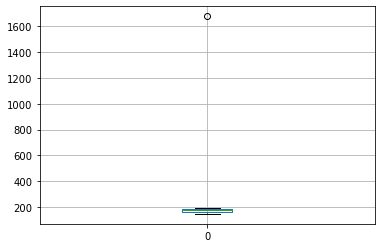

In [ ]:
pd.DataFrame(size1).boxplot()   #  boxplot for size1

<AxesSubplot:>

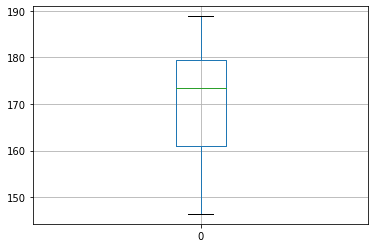

In [ ]:
pd.DataFrame(size1_range).boxplot()   #  boxplot for size1_range (without outliers)

<a id='Histogram'></a>
+ ### Histogram (直方圖)

<AxesSubplot:>

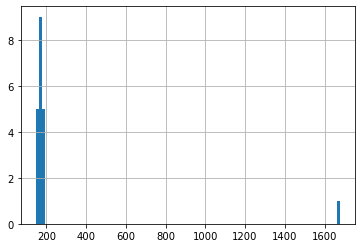

In [ ]:
size1.hist(bins=100)   #  histogram for size1

<AxesSubplot:>

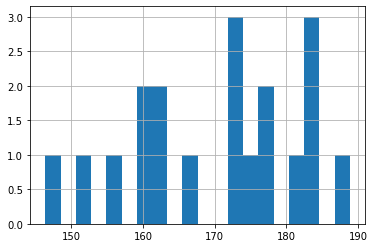

In [ ]:
size1_range.hist(bins=20)   #  histogram for size1_range

<a id='Groupby'></a>
## 4.6 Groupby

In [ ]:
df = users.copy()
df

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
for grp, data in df.groupby("job"):
    print('\n JOB = ', grp)
    print(data)


 JOB =  CEO
   name  age gender  job  height
7  lucy   52      F  CEO     NaN

 JOB =  CFO
    name  age gender  job  height
6  julie   44      F  CFO   175.0

 JOB =  CTO
    name  age gender  job  height
5  peter   48      M  CTO     NaN

 JOB =  engineer
   name  age gender       job  height
4  bill   33      M  engineer     NaN

 JOB =  manager
   name  age gender      job  height
3  paul   58      M  manager   192.0

 JOB =  student
    name  age gender      job  height
0  alice   19      F  student   165.0
1   john   26      M  student   180.0
2   eric   22      M  student   171.0


In [ ]:
df.groupby('job').mean()

,age,height
job,,
CEO,52.000000,NaN
CFO,44.000000,175.0
CTO,48.000000,NaN
engineer,33.000000,NaN
manager,58.000000,192.0
student,22.333333,172.0


<a id='Pivot_Tables'></a>
### 4.7  Pivot Tables (樞紐分析表 或 透視表)

<a id='Pivot_Tables_using_groupby'></a>
+ ### Pivot Tables using Pandas `groupby`

In [ ]:
users

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


In [ ]:
users.groupby('gender')[['age']].mean()

,age
gender,
F,38.333333
M,37.400000


In [ ]:
users.groupby('job')[['gender', 'name']].sum() 

,gender,name
job,,
CEO,F,lucy
CFO,F,julie
CTO,M,peter
engineer,M,bill
manager,M,paul
student,FMM,alicejohneric


###  [ Example 4.7.1 ] : Pivot table with `groupby`
> **STEP 1 :  Grouping by `gender` and `job`**
>
> **STEP 2 :  selecting `age`**
>
> **STEP 3 :  calculating `mean`**

In [ ]:
users.groupby(['gender', 'job'])['age'].mean()

gender  job     
F       CEO         52
        CFO         44
        student     19
M       CTO         48
        engineer    33
        manager     58
        student     24
Name: age, dtype: int64

In [ ]:
type(users.groupby(['gender', 'job'])['age'].mean())

pandas.core.series.Series

> **STEP 4 :  `unstack` _the hierarchical index_**
  - in order to show the hidden multidimensionality

In [ ]:
users.groupby(['gender', 'job'])['age'].mean().unstack()

job,CEO,CFO,CTO,engineer,manager,student
gender,,,,,,
F,52.0,44.0,NaN,NaN,NaN,19.0
M,NaN,NaN,48.0,33.0,58.0,24.0


###  [ Example 4.7.2 ] : Pivot table with `groupby`
> **STEP 1 :  Grouping by** 
>    1. **`gender`, `name` and `job`**
>    2. **`job`, `name` and `gender`**
>
>
> **STEP 2 :  selecting `age` & `height`**
>
> **STEP 3 :  calculating `mean`**

In [ ]:
users.groupby(['gender', 'name', 'job'])[['age', 'height']].mean()

age  height
gender name  job                  
F      alice student    19   165.0
       julie CFO        44   175.0
       lucy  CEO        52     NaN
M      bill  engineer   33     NaN
       eric  student    22   171.0
       john  student    26   180.0
       paul  manager    58   192.0
       peter CTO        48     NaN

In [ ]:
users.groupby(['job', 'name', 'gender'])[['age', 'height']].mean()

age  height
job      name  gender             
CEO      lucy  F        52     NaN
CFO      julie F        44   175.0
CTO      peter M        48     NaN
engineer bill  M        33     NaN
manager  paul  M        58   192.0
student  alice F        19   165.0
         eric  M        22   171.0
         john  M        26   180.0

> **STEP 4 :  `unstack`**

In [ ]:
users.groupby(['gender', 'name', 'job'])[['age', 'height']].mean().unstack()

age                                      height             \
job            CEO   CFO   CTO engineer manager student    CEO    CFO CTO   
gender name                                                                 
F      alice   NaN   NaN   NaN      NaN     NaN    19.0    NaN    NaN NaN   
       julie   NaN  44.0   NaN      NaN     NaN     NaN    NaN  175.0 NaN   
       lucy   52.0   NaN   NaN      NaN     NaN     NaN    NaN    NaN NaN   
M      bill    NaN   NaN   NaN     33.0     NaN     NaN    NaN    NaN NaN   
       eric    NaN   NaN   NaN      NaN     NaN    22.0    NaN    NaN NaN   
       john    NaN   NaN   NaN      NaN     NaN    26.0    NaN    NaN NaN   
       paul    NaN   NaN   NaN      NaN    58.0     NaN    NaN    NaN NaN   
       peter   NaN   NaN  48.0      NaN     NaN     NaN    NaN    NaN NaN   

                                       
job          engineer manager student  
gender name                            
F      alice      NaN     NaN   165.0  
       julie      NaN     NaN     NaN  
       lucy       NaN     NaN     NaN  
M      bill       NaN     NaN     NaN  
       eric       NaN     NaN   171.0  
       john       NaN     NaN   180.0  
       paul       NaN   192.0     NaN  
       peter      NaN     NaN     NaN

In [ ]:
users.groupby(['job', 'name', 'gender'])[['age', 'height']].mean().unstack()

age       height       
gender             F     M      F      M
job      name                           
CEO      lucy   52.0   NaN    NaN    NaN
CFO      julie  44.0   NaN  175.0    NaN
CTO      peter   NaN  48.0    NaN    NaN
engineer bill    NaN  33.0    NaN    NaN
manager  paul    NaN  58.0    NaN  192.0
student  alice  19.0   NaN  165.0    NaN
         eric    NaN  22.0    NaN  171.0
         john    NaN  26.0    NaN  180.0

<a id='Pivot_Tables_using_pivot_table'></a>
+ ### Pivot Tables using Pandas `pivot_table`
> -  `pivot_table` : **Numeric types to aggregate**
----------------
```python
# call signature as of Pandas 1.1.4
DataFrame.pivot_table(data, values=None, index=None, columns=None, 
                      aggfunc='mean', fill_value=None, margins=False, 
                      dropna=True, margins_name='All', observed=False)
```
----------------

In [ ]:
# users.groupby('gender')[['age']].mean()
#  is equivalent to the following usage:

users.pivot_table('age', index='gender')

,age
gender,
F,38.333333
M,37.400000


In [ ]:
# [ Example 1 ]:
#   users.groupby(['gender', 'job'])['age'].mean().unstack()  

users.pivot_table('age', index='gender', columns='job')

job,CEO,CFO,CTO,engineer,manager,student
gender,,,,,,
F,52.0,44.0,NaN,NaN,NaN,19.0
M,NaN,NaN,48.0,33.0,58.0,24.0


> + **Multi-level Pivot Tables**

In [ ]:
periods = pd.cut(users['age'], [0, 20, 40, 60])
users.pivot_table('height', ['gender', periods], 'job')

job                CFO  manager  student
gender age                              
F      (0, 20]     NaN      NaN    165.0
       (40, 60]  175.0      NaN      NaN
M      (20, 40]    NaN      NaN    175.5
       (40, 60]    NaN    192.0      NaN

+ **using `pd.qcut` to automatically compute quantiles**

In [ ]:
quantiles = pd.qcut(users['age'], 3)
users.pivot_table('height', ['gender', 'name'], [quantiles, 'job'])

age          (18.999, 28.333] (28.333, 46.667] (46.667, 58.0]
job                   student              CFO        manager
gender name                                                  
F      alice            165.0              NaN            NaN
       julie              NaN            175.0            NaN
M      eric             171.0              NaN            NaN
       john             180.0              NaN            NaN
       paul               NaN              NaN          192.0

<a id='File_I/O'></a>
## 5. File I/O

<a id='Write_to_csv_files'></a>
### 5.1 Write to .csv files

In [ ]:
import tempfile, os.path
tmpdir = tempfile.gettempdir()
tmpdir

'C:\\Users\\appcl\\AppData\\Local\\Temp'

In [ ]:
csv_filename = os.path.join(tmpdir, "users.csv")
users.to_csv(csv_filename, index=False)

In [ ]:
mydir = './'
csv_file = os.path.join(mydir, "users.csv")
users.to_csv(csv_file, index=False)

<a id='Read_from_csv_files'></a>
### 5.2 Read from .csv files

In [ ]:
other = pd.read_csv(csv_file)
other

,name,age,gender,job,height
0,alice,19,F,student,165.0
1,john,26,M,student,180.0
2,eric,22,M,student,171.0
3,paul,58,M,manager,192.0
4,bill,33,M,engineer,NaN
5,peter,48,M,CTO,NaN
6,julie,44,F,CFO,175.0
7,lucy,52,F,CEO,NaN


<a id='Read_csv_from_url'></a>
### 5.3 Read csv from url

In [ ]:
url = 'https://stats.idre.ucla.edu/stat/data/binary.csv'
idre_binary = pd.read_csv(url)
idre_binary.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [ ]:
idre_binary.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [ ]:
type(idre_binary)

pandas.core.frame.DataFrame

In [ ]:
idre_binary.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [ ]:
pd.value_counts(idre_binary["admit"], sort=False)/400   # ( 0 : Don't Admit ;    1 : Admit )

0    0.6825
1    0.3175
Name: admit, dtype: float64